In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime

In [3]:
df = pd.read_csv(r"src\tasks\task-1-data collection\aqi_data.csv")
df.head()

,Unnamed: 0,Datetime,CO,NO,NO2,O3,SO2,PM2_5,PM10,NH3,AQI
0,0,1661972400,1161.58,0.04,58.95,21.10,64.85,82.96,112.34,11.53,5
1,1,1661976000,1041.41,0.01,54.15,25.03,61.04,78.39,103.79,9.63,5
2,2,1661979600,988.01,0.01,50.72,27.18,58.17,75.54,97.87,8.99,5
3,3,1661983200,1054.76,0.01,48.67,24.68,52.93,75.56,96.49,10.89,5
4,4,1661986800,1241.68,0.05,50.04,18.24,51.50,80.91,103.00,14.57,5


In [5]:
ndf = df.drop("Unnamed: 0", axis=1)
ndf.head()

,Datetime,CO,NO,NO2,O3,SO2,PM2_5,PM10,NH3,AQI
0,1661972400,1161.58,0.04,58.95,21.10,64.85,82.96,112.34,11.53,5
1,1661976000,1041.41,0.01,54.15,25.03,61.04,78.39,103.79,9.63,5
2,1661979600,988.01,0.01,50.72,27.18,58.17,75.54,97.87,8.99,5
3,1661983200,1054.76,0.01,48.67,24.68,52.93,75.56,96.49,10.89,5
4,1661986800,1241.68,0.05,50.04,18.24,51.50,80.91,103.00,14.57,5


In [8]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4382 entries, 0 to 4381
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Datetime  4382 non-null   int64  
 1   CO        4382 non-null   float64
 2   NO        4382 non-null   float64
 3   NO2       4382 non-null   float64
 4   O3        4382 non-null   float64
 5   SO2       4382 non-null   float64
 6   PM2_5     4382 non-null   float64
 7   PM10      4382 non-null   float64
 8   NH3       4382 non-null   float64
 9   AQI       4382 non-null   int64  
dtypes: float64(8), int64(2)
memory usage: 342.5 KB


In [9]:
ndf['Datetime'] = pd.to_datetime(ndf['Datetime'], unit='s')

In [15]:
ndf['Time'] = ndf['Datetime'].dt.time
ndf['Datetime'] = ndf['Datetime'].dt.date

In [18]:
ndf.head()

,Datetime,CO,NO,NO2,O3,SO2,PM2_5,PM10,NH3,AQI,Time
0,2022-08-31,1161.58,0.04,58.95,21.10,64.85,82.96,112.34,11.53,5,19:00:00
1,2022-08-31,1041.41,0.01,54.15,25.03,61.04,78.39,103.79,9.63,5,20:00:00
2,2022-08-31,988.01,0.01,50.72,27.18,58.17,75.54,97.87,8.99,5,21:00:00
3,2022-08-31,1054.76,0.01,48.67,24.68,52.93,75.56,96.49,10.89,5,22:00:00
4,2022-08-31,1241.68,0.05,50.04,18.24,51.50,80.91,103.00,14.57,5,23:00:00


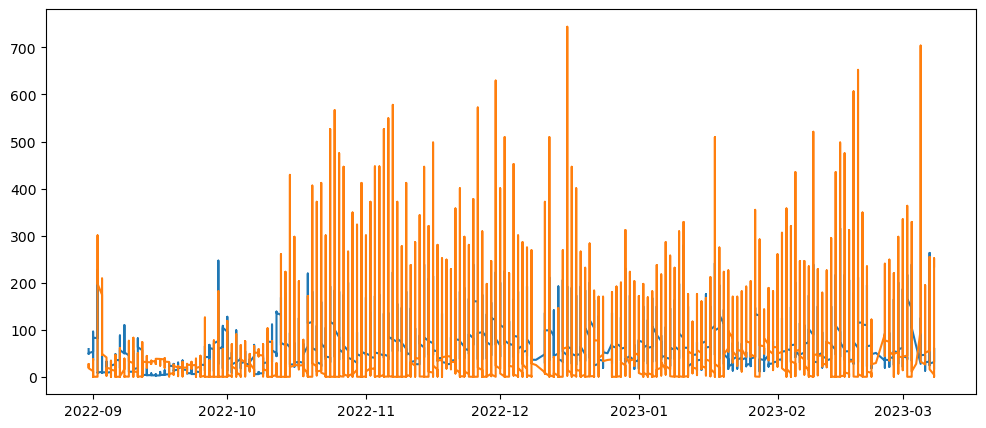

In [27]:
plt.figure(figsize=(12,5))
plt.plot(ndf['Datetime'], ndf['NO2'])
plt.plot(ndf['Datetime'], ndf['O3'])
plt.show()